# Taiwan House Price Prediction
using ramdom forest

In [1]:
import pandas as pd 
import numpy as np 
import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from src.Dataloader import Dataloader
from src.RamdomForest import RamdomForest
from src.score import score
from sklearn.utils import shuffle
from IPython.display import display, HTML
from datetime import date
%matplotlib inline

## parameter setting

In [2]:
df = pd.read_csv('data/train.csv')
parm = {
    'learning_rate' : 0.01,
    'n_estimators' : 5000,
    'max_depth' : [32],
    'num_leaves' : [256],
    'feature_fraction' : [0.9]
}

## loading data

In [3]:
dataloader = Dataloader()
X_train, X_test, y_train, y_test = dataloader.prepare_train_data(df, size = 0.2)

## train model

In [4]:
ramdom_forest = RamdomForest()
model = ramdom_forest.train_LGBM(X_train, y_train, X_test, y_test,parm)

C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is ['III_index', 'II_index', 'IV_index', 'IX_index', 'I_index', 'VIII_index', 'VII_index', 'VI_index', 'V_index', 'XIII_index', 'XII_index', 'XIV_index', 'XI_index', 'X_index', 'building_material', 'building_type', 'building_use', 'city_town', 'parking_price_isna', 'parking_way', 'txn_floor_isna']
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[5000]	training's l1: 19053.1	valid_1's l1: 130559
Finished.


## feature important

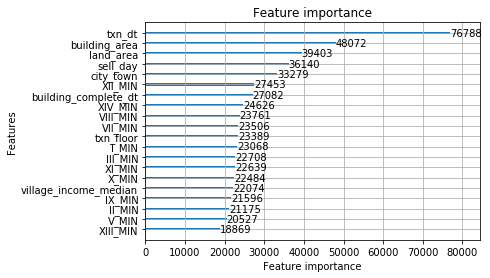

In [5]:
ax = model.plot_feature_important()

## training/testing loss

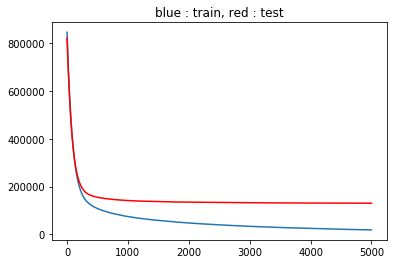

In [6]:
model.plot_loss()

## result

### training data 

In [7]:
y, y_true= model.predict(X_train, y_train)
point = score(y, y_true)
print("training data preformence : {} / 10000".format(point))

training data preformence : 9452.152056502302 / 10000


### testing data

In [8]:
y, y_true= model.predict(X_test,y_test)
point = score(y,y_true)
print("testing data preformence : {} / 10000".format(point))

testing data preformence : 5558.650066279008 / 10000
